In [126]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler #Necesario para la estandarizacion de los datos

In [127]:
import matplotlib.pyplot as plt

In [128]:
iris = datasets.load_iris()

In [129]:
X_iris = iris.data
y_iris = iris.target

In [130]:
#Dandole nombre a las columnas de iris.data
x = pd.DataFrame(iris.data , columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width'])
x

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [131]:
#Dandole nombre a la columna de iris.target
y = pd.DataFrame(iris.target , columns = ['Target'])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Text(0, 0.5, 'Petal Width')

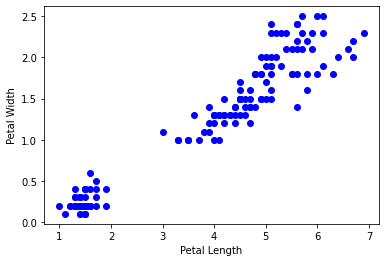

In [132]:
#Graficamos las flores por petalos 
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Text(0, 0.5, 'Petal Width')

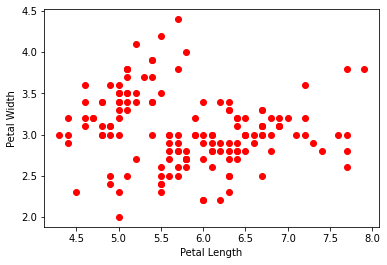

In [133]:
#Graficamos las flores por sepalos 
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = 'red')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

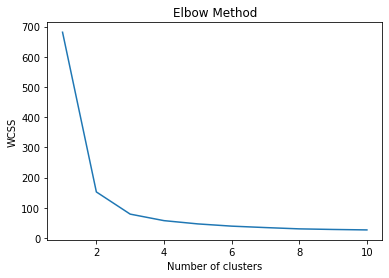

In [134]:
#Para saber el numero de clusters , utilizaremos el metodo del codo

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
#Vemos que nos indica que , el numero exacto de clusters se encuentra en el 3

In [ ]:
#Ahora se deberia standarizar , pero no se hara porq salen porcentajes de score menores 

In [136]:
#Definiendo el modelo Kmeans
model = KMeans(n_clusters = 3 , max_iter = 1000)
model.fit(x) #Entrenando los datos de 'x'

KMeans(max_iter=1000, n_clusters=3)

In [137]:
y_labels = model.labels_ #Etiquetas que encontro basado en la similitud
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [138]:
y_pred_kmeans = model.predict(x) #Realizamos la prediccion de y con respecto a los x

In [139]:
y_pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [140]:
from sklearn import metrics
acc = metrics.adjusted_rand_score(y_iris,y_pred_kmeans) #comparamos los datos de la prediccion con los datos del target real
print(acc)

0.7302382722834697


Text(0, 0.5, 'Petal Width')

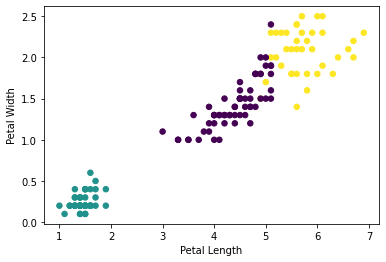

In [100]:
#Graficando
plt.scatter(x['Petal Length'],x['Petal Width'], c = y_pred_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Text(0, 0.5, 'Petal Width')

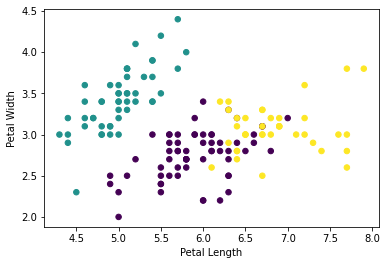

In [101]:
plt.scatter(x['Sepal Length'],x['Sepal Width'], c = y_pred_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)